<a href="https://colab.research.google.com/github/Himanshu-1703/ML_Algorithms/blob/main/Gradient_Descent_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import make_regression

In [ ]:
X,y = make_regression(n_samples=50,n_features=1,n_informative=1,noise=40,random_state=46)

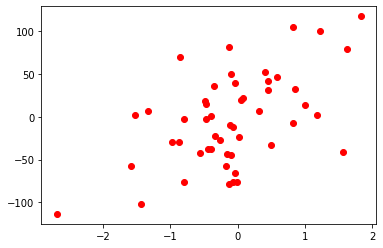

In [ ]:
# plot the graph

plt.scatter(X,y,color='red')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X,y)

y_pred = lr.predict(X)

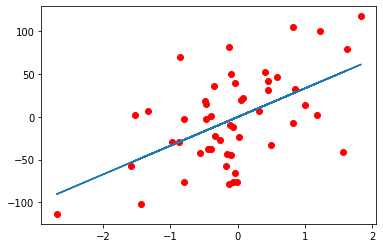

In [ ]:
# plot the regression line on the graph


plt.scatter(X,y,color='red')
plt.plot(X,y_pred)
plt.show()

In [ ]:
lr.intercept_,lr.coef_

(-0.14419295949957434, array([33.52420089]))

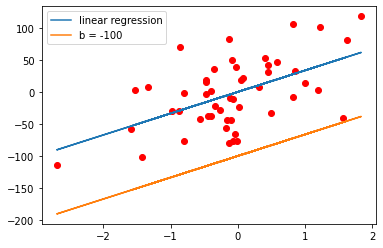

In [ ]:
# Perform gradient descent

m = lr.coef_[0]

b = -100

y_pred1 = (m * X) + b

# plot the y_pred1

plt.scatter(X,y,color='red')
plt.plot(X,y_pred,label='linear regression')
plt.plot(X,y_pred1,label='b = -100')
plt.legend()
plt.show()


In [ ]:
b

-100

In [ ]:
b_slope = -2 * np.sum(y-y_pred1)
b_slope * 0.0001

-49.92790352025022

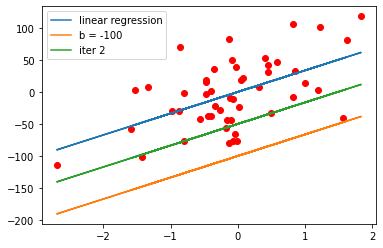

In [ ]:
# update the value of b

b_slope = -2 * np.sum(y-y_pred1)

step_size = b_slope *  0.0001 

b = b - step_size

y_pred2 = (m * X) + b

# plot the y_pred1

plt.scatter(X,y,color='red')
plt.plot(X,y_pred,label='linear regression')
plt.plot(X,y_pred1,label='b = -100')
plt.plot(X,y_pred2,label='iter 2')
plt.legend()
plt.show()

In [ ]:
b_slope * 0.0001

-49.92790352025022

In [ ]:
# run this inside a loop

def update_b(original_b,epochs):
    b = original_b
    m  = lr.coef_[0]
    learning_rate = 0.0001
    y_pred = (m * X) + b

    plt.scatter(X,y,color='red')
    plt.plot(X,y_pred,label='original')

    for i in range(1,epochs+1):
        print('The epoch number is',i)
        b_slope = -2 * np.sum(y-y_pred)
        print('the slope is ',b_slope)

        step_size = b_slope * learning_rate

        b = b - step_size
        print('The new b is',b)
        y_pred = (m * X) + b

        # plot the y_pred1

        
        plt.plot(X,y_pred)
        
        plt.legend()

    plt.show()

    

In [ ]:
lr.intercept_

-0.14419295949957434

The epoch number is 1
the slope is  2835720.9647974977
The new b is 283.4279035202502
The epoch number is 2
the slope is  1417860.4823987489
The new b is 141.6418552803753
The epoch number is 3
the slope is  708930.2411993743
The new b is 70.74883116043786
The epoch number is 4
the slope is  354465.12059968716
The new b is 35.30231910046914
The epoch number is 5
the slope is  177232.5602998436
The new b is 17.57906307048478
The epoch number is 6
the slope is  88616.28014992177
The new b is 8.7174350554926
The epoch number is 7
the slope is  44308.14007496088
The new b is 4.286621047996513
The epoch number is 8
the slope is  22154.070037480444
The new b is 2.0712140442484683
The epoch number is 9
the slope is  11077.035018740222
The new b is 0.9635105423744461
The epoch number is 10
the slope is  5538.517509370111
The new b is 0.409658791437435
The epoch number is 11
the slope is  2769.2587546850555
The new b is 0.13273291596892944
The epoch number is 12
the slope is  1384.6293773425277

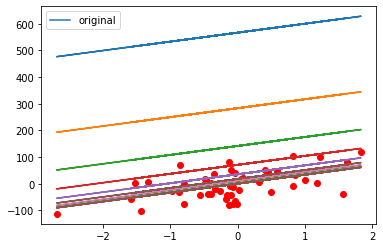

In [ ]:
update_b(567,15)

In [ ]:
# gradient descent class


class GD_Regressor:
    def __init__(self,lr,epochs,m,b):
        self.lr = lr
        self.epochs = epochs
        self.m = m
        self.b = b

    def fit(self,X,y):
        for i in range(self.epochs):
            b_slope = -2 * np.sum(y-(self.m*X.ravel())-self.b)
            step_size_b = b_slope * self.lr
            
            m_slope = -2 * np.sum((y-(self.m*X.ravel())-self.b) * X.ravel()) 
            step_size_m = m_slope * self.lr
            
            self.m = self.m  - step_size_m
            self.b = self.b - step_size_b

        print('The coef is',self.m)
        print('The intercept is',self.b)


In [ ]:
class GD_Regressor:
    def __init__(self,lr,epochs,m,b):
        self.lr = lr
        self.epochs = epochs
        self.m = m
        self.b = b

    def fit(self,X,y):
        all_m = []
        all_b = []
        all_m.append(self.m)
        all_b.append(self.b)

        for i in range(self.epochs):
            b_slope = -2 * np.sum(y-(self.m*X.ravel())-self.b)
            step_size_b = b_slope * self.lr
            
            m_slope = -2 * np.sum((y-(self.m*X.ravel())-self.b) * X.ravel()) 
            step_size_m = m_slope * self.lr
            
            self.m = self.m  - step_size_m
            self.b = self.b - step_size_b

            all_m.append(self.m)
            all_b.append(self.b)
        # print('The coef is',self.m)
        # print('The intercept is',self.b)

        return all_m,all_b

In [ ]:
gd = GD_Regressor(0.0005,200,-150,-76)

In [ ]:
m,b = gd.fit(X,y)

In [ ]:
from matplotlib.animation import FuncAnimation

In [ ]:
import ipywidgets as widgets

In [ ]:
# plot the animation


epochs = np.arange(0,200)

m = np.array(m).ravel()
b = np.array(b).ravel()

def update_graph(epoch):
    plt.scatter(X,y,c='red') 
  
    label = f'epoch{epoch+1}'
    plt.plot(X,m[epoch]*X.ravel()+b[epoch],color='green')
    plt.xlabel(label)
    plt.xlim(-3,3)
    plt.ylim(-200,200)

play = widgets.Play(min=0,max=199)

widgets.interactive(update_graph,epoch=play)



interactive(children=(Play(value=0, description='epoch', max=199), Output()), _dom_classes=('widget-interact',…